In [2]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

In [3]:
df = pd.read_csv('sat.trn',header=None,sep = '\s')

In [4]:
X = df.iloc[:,:-1].to_numpy()
y = df.iloc[:,-1].to_numpy()

# 7-> 6 and 1-6 -> 0:5
y[y==7] = 6
for i in range(6):
    y[y == (i + 1)] = i

In [5]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [6]:
numbers = [*range(6)]
list_y = y.tolist()
digits_indexes = []
for digit in numbers:
    li = [i for i in range(len(list_y)) if list_y[i] == digit]
    print(digit, len(li))

0 1072
1 479
2 961
3 415
4 470
5 1038


In [7]:
def get_winner(class1, class2):
    
    numbers = [*range(6)] # number 2 > number 1
    number_of_classification = 2

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])


    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = len(class1_label) + len(class2_label)
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 20)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-satellite2")
    [stats, winner] = run(config_path)
    
    return winner

In [8]:
winner_list = []

for class1 in range(0,5):
    for class2 in range(class1+1,6):
        winner = get_winner(class1, class2)
        winner_list.append(winner)

number of class1:1072
number of class2:479

 ****** Running generation 0 ****** 

Population's average fitness: 0.40893 stdev: 0.20943
Best fitness: 0.95809 - size: (2, 7) - species 1 - id 19
Average adjusted fitness: 0.401
Mean genetic distance 2.711, standard deviation 0.479
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 5.251 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55407 stdev: 0.23971
Best fitness: 0.95809 - size: (2, 7) - species 6 - id 19
Average adjusted fitness: 0.520
Mean genetic distance 2.806, standard deviation 0.453
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 5.353 sec (5.302 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57652 stdev: 0.23905
Best fitness: 0.96325 - size: (4, 11) - species 4 - id 538
Average adjusted fitness: 0.498
Mean genetic distance 2.951, standard deviation 0.511
Population of 197 members in 20 species
Total extinctions:

Population's average fitness: 0.54054 stdev: 0.10678
Best fitness: 0.96065 - size: (2, 9) - species 7 - id 477
Average adjusted fitness: 0.326
Mean genetic distance 2.961, standard deviation 0.491
Population of 206 members in 31 species
Total extinctions: 0
Generation time: 5.570 sec (5.198 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.53912 stdev: 0.11349
Best fitness: 0.96065 - size: (2, 9) - species 3 - id 477
Average adjusted fitness: 0.433
Mean genetic distance 2.963, standard deviation 0.501
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 5.737 sec (5.288 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.54670 stdev: 0.11213
Best fitness: 0.96065 - size: (2, 9) - species 3 - id 477
Average adjusted fitness: 0.109
Mean genetic distance 2.968, standard deviation 0.508
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 5.673 sec (5.343 average)

 ****** Running ge


Population's average fitness: 0.62409 stdev: 0.21170
Best fitness: 0.96839 - size: (4, 10) - species 37 - id 903
Average adjusted fitness: 0.519
Mean genetic distance 3.132, standard deviation 0.496
Population of 205 members in 41 species
Total extinctions: 0
Generation time: 4.617 sec (4.340 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.59547 stdev: 0.22793
Best fitness: 0.96839 - size: (4, 10) - species 37 - id 903
Average adjusted fitness: 0.311
Mean genetic distance 3.131, standard deviation 0.497
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 4.451 sec (4.351 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60009 stdev: 0.22767
Best fitness: 0.96839 - size: (4, 10) - species 37 - id 903
Average adjusted fitness: 0.306
Mean genetic distance 3.113, standard deviation 0.492
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 4.390 sec (4.366 average)

 ****** Ru

Population of 198 members in 35 species
Total extinctions: 0
Generation time: 4.809 sec (4.981 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60512 stdev: 0.21631
Best fitness: 0.95460 - size: (6, 14) - species 27 - id 1884
Average adjusted fitness: 0.408
Mean genetic distance 3.136, standard deviation 0.487
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 5.012 sec (4.893 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.58398 stdev: 0.22040
Best fitness: 0.95460 - size: (6, 14) - species 27 - id 1884
Average adjusted fitness: 0.416
Mean genetic distance 3.156, standard deviation 0.485
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 5.075 sec (4.945 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.60572 stdev: 0.21697
Best fitness: 0.95460 - size: (6, 14) - species 27 - id 1884
Average adjusted fitness: 0.405
Mean genetic distance 

Population's average fitness: 0.61562 stdev: 0.18906
Best fitness: 0.98531 - size: (3, 12) - species 13 - id 2602
Average adjusted fitness: 0.392
Mean genetic distance 2.969, standard deviation 0.509
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 7.389 sec (6.775 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.60998 stdev: 0.19180
Best fitness: 0.98531 - size: (3, 12) - species 13 - id 2602
Average adjusted fitness: 0.518
Mean genetic distance 3.006, standard deviation 0.508
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 7.754 sec (6.920 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.60068 stdev: 0.19034
Best fitness: 0.98531 - size: (3, 12) - species 13 - id 2602
Average adjusted fitness: 0.574
Mean genetic distance 3.019, standard deviation 0.506
Population of 194 members in 28 species
Total extinctions: 0
Generation time: 8.652 sec (7.148 average)
number o

Population's average fitness: 0.52724 stdev: 0.13091
Best fitness: 0.95861 - size: (2, 6) - species 9 - id 225
Average adjusted fitness: 0.431
Mean genetic distance 2.877, standard deviation 0.498
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 2.505 sec (2.395 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54872 stdev: 0.14709
Best fitness: 0.96644 - size: (4, 10) - species 20 - id 493
Average adjusted fitness: 0.441
Mean genetic distance 2.895, standard deviation 0.507
Population of 203 members in 22 species
Total extinctions: 0
Generation time: 2.412 sec (2.401 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.59676 stdev: 0.17081
Best fitness: 0.96644 - size: (4, 10) - species 20 - id 493
Average adjusted fitness: 0.465
Mean genetic distance 2.869, standard deviation 0.517
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 2.525 sec (2.432 average)

 ****** Runnin

Population's average fitness: 0.59669 stdev: 0.18709
Best fitness: 0.92308 - size: (3, 8) - species 22 - id 265
Average adjusted fitness: 0.497
Mean genetic distance 2.943, standard deviation 0.502
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 2.824 sec (2.531 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60148 stdev: 0.17861
Best fitness: 0.92308 - size: (3, 8) - species 22 - id 265
Average adjusted fitness: 0.502
Mean genetic distance 2.928, standard deviation 0.490
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 2.881 sec (2.581 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61532 stdev: 0.16773
Best fitness: 0.92308 - size: (3, 8) - species 22 - id 265
Average adjusted fitness: 0.281
Mean genetic distance 2.954, standard deviation 0.499
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 2.876 sec (2.618 average)

 ****** Running

Population's average fitness: 0.66997 stdev: 0.26356
Best fitness: 0.98484 - size: (4, 10) - species 32 - id 1349
Average adjusted fitness: 0.603
Mean genetic distance 3.104, standard deviation 0.525
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 4.718 sec (4.277 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.67168 stdev: 0.25965
Best fitness: 0.98879 - size: (3, 11) - species 12 - id 1689
Average adjusted fitness: 0.614
Mean genetic distance 3.105, standard deviation 0.529
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 4.597 sec (4.392 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.69034 stdev: 0.24891
Best fitness: 0.98879 - size: (3, 11) - species 12 - id 1689
Average adjusted fitness: 0.632
Mean genetic distance 3.104, standard deviation 0.529
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 4.729 sec (4.485 average)

 ******

Population's average fitness: 0.57209 stdev: 0.18250
Best fitness: 0.78561 - size: (4, 9) - species 23 - id 1571
Average adjusted fitness: 0.251
Mean genetic distance 3.112, standard deviation 0.562
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 4.276 sec (4.035 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.55826 stdev: 0.18771
Best fitness: 0.78561 - size: (4, 9) - species 23 - id 1571
Average adjusted fitness: 0.255
Mean genetic distance 3.096, standard deviation 0.552
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 4.398 sec (4.105 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.57960 stdev: 0.17909
Best fitness: 0.78561 - size: (4, 9) - species 23 - id 1571
Average adjusted fitness: 0.265
Mean genetic distance 3.121, standard deviation 0.554
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 4.277 sec (4.146 average)

 ****** Ru

Population's average fitness: 0.61723 stdev: 0.20561
Best fitness: 0.92383 - size: (4, 13) - species 9 - id 2625
Average adjusted fitness: 0.328
Mean genetic distance 3.141, standard deviation 0.510
Population of 189 members in 33 species
Total extinctions: 0
Generation time: 4.487 sec (4.493 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.61241 stdev: 0.20716
Best fitness: 0.92383 - size: (4, 13) - species 9 - id 2625
Average adjusted fitness: 0.296
Mean genetic distance 3.141, standard deviation 0.505
Population of 192 members in 32 species
Total extinctions: 0
Generation time: 4.336 sec (4.491 average)
number of class1:961
number of class2:1038

 ****** Running generation 0 ****** 

Population's average fitness: 0.50150 stdev: 0.03518
Best fitness: 0.61031 - size: (2, 7) - species 6 - id 179
Average adjusted fitness: 0.228
Mean genetic distance 2.855, standard deviation 0.485
Population of 201 members in 21 species
Total extinctions: 0
Generation tim

Population's average fitness: 0.53537 stdev: 0.07198
Best fitness: 0.83842 - size: (3, 9) - species 12 - id 290
Average adjusted fitness: 0.293
Mean genetic distance 2.921, standard deviation 0.517
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 2.415 sec (2.228 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.53110 stdev: 0.08799
Best fitness: 0.83842 - size: (3, 9) - species 12 - id 290
Average adjusted fitness: 0.332
Mean genetic distance 2.918, standard deviation 0.502
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 2.515 sec (2.300 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.53811 stdev: 0.08265
Best fitness: 0.83842 - size: (3, 9) - species 12 - id 290
Average adjusted fitness: 0.315
Mean genetic distance 2.917, standard deviation 0.492
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 2.599 sec (2.359 average)

 ****** Running

Population's average fitness: 0.62717 stdev: 0.17004
Best fitness: 0.72264 - size: (4, 11) - species 24 - id 879
Average adjusted fitness: 0.333
Mean genetic distance 2.925, standard deviation 0.523
Population of 203 members in 24 species
Total extinctions: 0
Generation time: 4.372 sec (3.930 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.64192 stdev: 0.15925
Best fitness: 0.72264 - size: (4, 11) - species 24 - id 879
Average adjusted fitness: 0.349
Mean genetic distance 2.919, standard deviation 0.529
Population of 205 members in 24 species
Total extinctions: 0
Generation time: 4.319 sec (3.978 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61801 stdev: 0.17120
Best fitness: 0.72264 - size: (4, 11) - species 24 - id 879
Average adjusted fitness: 0.329
Mean genetic distance 2.931, standard deviation 0.532
Population of 204 members in 24 species
Total extinctions: 0
Generation time: 4.546 sec (4.042 average)

 ****** Runn

Population's average fitness: 0.61943 stdev: 0.18427
Best fitness: 0.90716 - size: (3, 9) - species 29 - id 1160
Average adjusted fitness: 0.472
Mean genetic distance 3.055, standard deviation 0.515
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 4.454 sec (4.246 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.62269 stdev: 0.18546
Best fitness: 0.90716 - size: (3, 9) - species 29 - id 1160
Average adjusted fitness: 0.399
Mean genetic distance 3.045, standard deviation 0.518
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 4.535 sec (4.312 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.62757 stdev: 0.18476
Best fitness: 0.90716 - size: (3, 9) - species 29 - id 1160
Average adjusted fitness: 0.433
Mean genetic distance 3.051, standard deviation 0.517
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 4.499 sec (4.367 average)

 ****** Ru

In [9]:
classes = []
for class1 in range(0,5):
    for class2 in range(class1+1, 6):
        classes.append([class1, class2])

In [10]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-satellite2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [11]:
test_df = pd.read_csv('sat.tst',header=None,sep = '\s')

testX = test_df.iloc[:,:-1].to_numpy()
testy = test_df.iloc[:,-1].to_numpy()

# 7-> 6 and 1-6 -> 0:5
testy[testy==7] = 6
for i in range(6):
    testy[testy == (i + 1)] = i

In [16]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(6)]
    class1, class2 = classes[i]
    
    class1_indexes = []
    class2_indexes = []
    
    test_X = testX[j]
    test_y = testy[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    
    
    return pred_outputs

In [38]:
# 这里反而pred-outputs 的0 是第二类(id是1)，1是第一类（id是0）
pred_value = []

for j in range(2000):
    pred = []
    vote = [0,0,0,0,0,0]
    for i in range(15):
        pred_outputs = get_pred_real(i, j)
        #print(i,classes[i],pred_outputs[0][0])
        vote_for = classes[i][1 - pred_outputs[0]]
        vote[vote_for] += 1 #1 is class 1(id:0) and 0 is class 2(id:1)
    pred_value.append(np.where(vote==np.max(vote)))        
    #print(np.array(pred).T)

In [39]:
from random import randint
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [40]:
np.sum(list_P == testy)/2000

0.744

In [41]:
for i,p_value in enumerate(pred_value):
    print("#{} index:{} real:{}".format(i, p_value[0], testy[i]))

#0 index:[0 2] real:2
#1 index:[0 2] real:2
#2 index:[2] real:3
#3 index:[2] real:3
#4 index:[2] real:3
#5 index:[2] real:3
#6 index:[2] real:3
#7 index:[2] real:3
#8 index:[2 3 5] real:3
#9 index:[2 3 5] real:3
#10 index:[2 3 5] real:3
#11 index:[2 3 5] real:3
#12 index:[2 3 5] real:3
#13 index:[2 3 5] real:3
#14 index:[2] real:2
#15 index:[2] real:2
#16 index:[2] real:2
#17 index:[2] real:2
#18 index:[2] real:2
#19 index:[2] real:2
#20 index:[2] real:2
#21 index:[2] real:2
#22 index:[2] real:2
#23 index:[2] real:2
#24 index:[2] real:2
#25 index:[2] real:2
#26 index:[2] real:2
#27 index:[4] real:4
#28 index:[2 3 5] real:5
#29 index:[2 3 5] real:5
#30 index:[4 5] real:5
#31 index:[4] real:4
#32 index:[2] real:2
#33 index:[2] real:2
#34 index:[2] real:3
#35 index:[2] real:3
#36 index:[2] real:3
#37 index:[2 3 5] real:3
#38 index:[2 3 5] real:3
#39 index:[2 3 5] real:3
#40 index:[2 3 5] real:3
#41 index:[4] real:3
#42 index:[2] real:2
#43 index:[2] real:2
#44 index:[2] real:2
#45 index:[

#570 index:[4] real:4
#571 index:[4] real:4
#572 index:[4] real:4
#573 index:[4] real:4
#574 index:[4] real:4
#575 index:[4] real:4
#576 index:[4] real:4
#577 index:[1] real:1
#578 index:[1] real:1
#579 index:[2] real:3
#580 index:[2] real:3
#581 index:[2] real:3
#582 index:[2] real:3
#583 index:[2] real:2
#584 index:[2] real:2
#585 index:[2] real:2
#586 index:[1] real:1
#587 index:[1] real:1
#588 index:[5] real:5
#589 index:[2 3 5] real:5
#590 index:[2 3 5] real:5
#591 index:[2] real:5
#592 index:[2 3 5] real:5
#593 index:[5] real:5
#594 index:[2] real:5
#595 index:[4] real:4
#596 index:[4] real:4
#597 index:[4] real:4
#598 index:[4] real:4
#599 index:[4] real:4
#600 index:[4] real:4
#601 index:[1] real:1
#602 index:[1] real:1
#603 index:[2] real:3
#604 index:[2] real:2
#605 index:[1] real:1
#606 index:[1] real:1
#607 index:[1] real:1
#608 index:[1] real:1
#609 index:[5] real:5
#610 index:[5] real:5
#611 index:[5] real:5
#612 index:[5] real:5
#613 index:[5] real:5
#614 index:[5] real:

In [42]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, testy)
print(cm)

[[439   3   7   1  13   1]
 [  0 196   0   0   3   0]
 [  7   0 341 120  12  92]
 [  0   2   5  26  11  38]
 [ 14  21   5   7 162  15]
 [  1   2  39  57  36 324]]


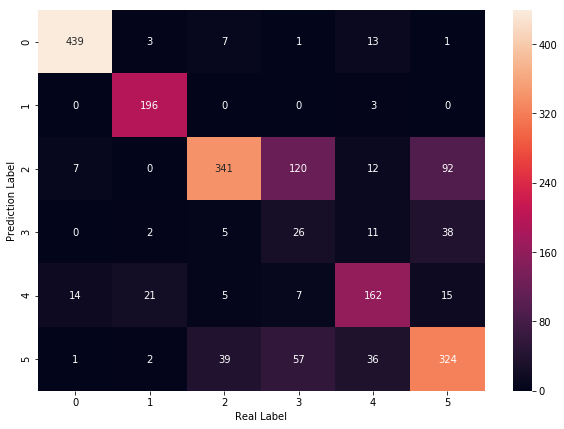

In [43]:
import seaborn as sn

df_cm = pd.DataFrame(cm, index = [i for i in "012345"],
                  columns = [i for i in "012345"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, fmt='.20g', annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()